# Group Project: Heart Disease Prediction with Logistic Regression

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
heart = df.copy()
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Inspect Data types & Missing Values

In [3]:
heart.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [4]:
heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Crosstabs: Independent Variables vs Target Variable (HeartDisease)

In [5]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
# Categorical variables of interest
cat_cols = ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Loop through the list of categorical variables and output crosstabs against the target variable
for col in cat_cols:
    print(f'{col} Crosstab HeartDisease')
    display(pd.crosstab(heart[col], heart['HeartDisease'], normalize='index'))
    print('')
    

Smoking Crosstab HeartDisease


HeartDisease,No,Yes
Smoking,,
No,0.939666,0.060334
Yes,0.878423,0.121577



AlcoholDrinking Crosstab HeartDisease


HeartDisease,No,Yes
AlcoholDrinking,,
No,0.911978,0.088022
Yes,0.947605,0.052395



Stroke Crosstab HeartDisease


HeartDisease,No,Yes
Stroke,,
No,0.925310,0.074690
Yes,0.636341,0.363659



DiffWalking Crosstab HeartDisease


HeartDisease,No,Yes
DiffWalking,,
No,0.937015,0.062985
Yes,0.774195,0.225805



Sex Crosstab HeartDisease


HeartDisease,No,Yes
Sex,,
Female,0.933053,0.066947
Male,0.893815,0.106185



AgeCategory Crosstab HeartDisease


HeartDisease,No,Yes
AgeCategory,,
18-24,0.993828,0.006172
25-29,0.992156,0.007844
30-34,0.987949,0.012051
35-39,0.985596,0.014404
40-44,0.976864,0.023136
45-49,0.965857,0.034143
50-54,0.945513,0.054487
55-59,0.926001,0.073999
60-64,0.901235,0.098765



Race Crosstab HeartDisease


HeartDisease,No,Yes
Race,,
American Indian/Alaskan Native,0.895809,0.104191
Asian,0.967030,0.032970
Black,0.924626,0.075374
Hispanic,0.947424,0.052576
Other,0.918924,0.081076
White,0.908214,0.091786



Diabetic Crosstab HeartDisease


HeartDisease,No,Yes
Diabetic,,
No,0.935031,0.064969
"No, borderline diabetes",0.883645,0.116355
Yes,0.780476,0.219524
Yes (during pregnancy),0.957796,0.042204



PhysicalActivity Crosstab HeartDisease


HeartDisease,No,Yes
PhysicalActivity,,
No,0.862413,0.137587
Yes,0.929468,0.070532



GenHealth Crosstab HeartDisease


HeartDisease,No,Yes
GenHealth,,
Excellent,0.977559,0.022441
Fair,0.795715,0.204285
Good,0.897368,0.102632
Poor,0.658960,0.341040
Very good,0.952739,0.047261



Asthma Crosstab HeartDisease


HeartDisease,No,Yes
Asthma,,
No,0.918967,0.081033
Yes,0.884937,0.115063



KidneyDisease Crosstab HeartDisease


HeartDisease,No,Yes
KidneyDisease,,
No,0.922348,0.077652
Yes,0.706681,0.293319



SkinCancer Crosstab HeartDisease


HeartDisease,No,Yes
SkinCancer,,
No,0.922776,0.077224
Yes,0.832992,0.167008


## Explore Categorical Variables
#### <u>AgeCategory</u> has categories that can be condensed. 
   * Young Adult (18-39)
   * Adult (40-59)
   * Older Adult (60 +)

In [7]:
heart['AgeCategory'].value_counts().sort_index()

18-24          21064
25-29          16955
30-34          18753
35-39          20550
40-44          21006
45-49          21791
50-54          25382
55-59          29757
60-64          33686
65-69          34151
70-74          31065
75-79          21482
80 or older    24153
Name: AgeCategory, dtype: int64

In [8]:
def age_transform(age):
    """This function reduces the amount of categories when applied to the
       the AgeCategory Column.    
    """
    
    # List of categories for the if-statement
    young = ['18-24', '25-29', '30-34', '35-39']
    adult = ['40-44', '45-49', '50-54', '55-59']
    
    if age in young:
        return 'Young Adult (18-39)'
    elif age in adult:
        return 'Adult (40-59)'
    else:
        return 'Older Adult (60+)'

In [9]:
# Create a new column with function
heart['AgeCategory2'] = heart['AgeCategory'].apply(age_transform)

# Check percentages in each category
heart['AgeCategory2'].value_counts(normalize=True)

Older Adult (60+)      0.451968
Adult (40-59)          0.306246
Young Adult (18-39)    0.241786
Name: AgeCategory2, dtype: float64

#### <u>Race</u> has categories that can be condensed. 
   * 'Asian' & 'American Indian/Alaskan Native' can be combined with 'Other' 

In [10]:
heart['Race'].value_counts(normalize=True)

White                             0.766779
Hispanic                          0.085824
Black                             0.071730
Other                             0.034172
Asian                             0.025229
American Indian/Alaskan Native    0.016267
Name: Race, dtype: float64

In [11]:
# Replace values to condense the categories
heart['Race'] = heart['Race'].replace(['Asian','American Indian/Alaskan Native'], 'Other')

# Verify the changes
heart['Race'].value_counts(normalize=True)

White       0.766779
Hispanic    0.085824
Other       0.075667
Black       0.071730
Name: Race, dtype: float64

## Rename Yes-No Values with Descriptive Labels

### Smoking
   * Smoker / Non-Smoker

In [12]:
heart['Smoking2'] = heart['Smoking'].apply(lambda x: 'Smoker' if x == 'Yes' else 'Non-Smoker')

heart['Smoking2'].value_counts()

Non-Smoker    187887
Smoker        131908
Name: Smoking2, dtype: int64

### AlcoholDrinking
   * Drinks Alcohol / No Alcohol

In [13]:
heart['AlcoholDrinking2'] = heart['AlcoholDrinking'].apply(lambda x: 'Drinks Alcohol' if x == 'Yes' else 'No Alcohol')

heart['AlcoholDrinking2'].value_counts()

No Alcohol        298018
Drinks Alcohol     21777
Name: AlcoholDrinking2, dtype: int64

### Stroke
   * Had Stroke(s) / No Stokes

In [14]:
heart['Stroke2'] = heart['Stroke'].apply(lambda x: 'Had Stroke(s)' if x == 'Yes' else 'No Strokes')

heart['Stroke2'].value_counts()

No Strokes       307726
Had Stroke(s)     12069
Name: Stroke2, dtype: int64

### DiffWalking
   *  Difficulty Walking / Walks Well

In [15]:
heart['DiffWalking2'] = heart['DiffWalking'].apply(lambda x: 'Difficulty Walking' if x == 'Yes' else 'Walks Well')

heart['DiffWalking2'].value_counts()

Walks Well            275385
Difficulty Walking     44410
Name: DiffWalking2, dtype: int64

### Diabetic
   * Has/Had Diabeties / Never Diabetic

In [16]:
heart['Diabetic2'] = heart['Diabetic'].replace(['Yes', 'Yes (during pregnancy)'], 'Has/Had Diabeties')
heart['Diabetic2'] = heart['Diabetic2'].replace(['No', 'No, borderline diabetes'], 'Never Diabetic')


heart['Diabetic2'].value_counts()

Never Diabetic       276434
Has/Had Diabeties     43361
Name: Diabetic2, dtype: int64

### PhysicalActivity
   * Physically Active / Sedentary

In [17]:
heart['PhysicalActivity2'] = heart['PhysicalActivity'].apply(lambda x: 'Physically Active' if x == 'Yes' else 'Sedentary')

heart['PhysicalActivity2'].value_counts()

Physically Active    247957
Sedentary             71838
Name: PhysicalActivity2, dtype: int64

### Asthma
   * Has Asthma / No Asthma

In [18]:
heart['Asthma2'] = heart['Asthma'].apply(lambda x: 'Has Asthma' if x == 'Yes' else 'No Asthma')

heart['Asthma2'].value_counts()

No Asthma     276923
Has Asthma     42872
Name: Asthma2, dtype: int64

### Kidney Disease
   * Has Kidney Disease / No Kidney Disease

In [19]:
heart['KidneyDisease2'] = heart['KidneyDisease'].apply(lambda x: 'Has Kidney Disease' if x == 'Yes' else 'No Kidney Disease')

heart['KidneyDisease2'].value_counts()

No Kidney Disease     308016
Has Kidney Disease     11779
Name: KidneyDisease2, dtype: int64

### SkinCancer
   * Has Skin Cancer / No Skin Cancer

In [20]:
heart['SkinCancer2'] = heart['SkinCancer'].apply(lambda x: 'Has Skin Cancer' if x == 'Yes' else 'No Skin Cancer')

heart['SkinCancer2'].value_counts()

No Skin Cancer     289976
Has Skin Cancer     29819
Name: SkinCancer2, dtype: int64

## Interaction Variables

#### Smoking vs AlcoholDrinking

In [21]:
heart['Smoking_vs_AlcoholDrinking'] = heart['Smoking2'] + '_' + heart['AlcoholDrinking2']

heart['Smoking_vs_AlcoholDrinking'].value_counts()

Non-Smoker_No Alcohol        179525
Smoker_No Alcohol            118493
Smoker_Drinks Alcohol         13415
Non-Smoker_Drinks Alcohol      8362
Name: Smoking_vs_AlcoholDrinking, dtype: int64

#### Smoking vs Stroke

In [22]:
heart['Smoking_vs_Stroke'] = heart['Smoking2'] + '_' + heart['Stroke2']

heart['Smoking_vs_Stroke'].value_counts()

Non-Smoker_No Strokes       182633
Smoker_No Strokes           125093
Smoker_Had Stroke(s)          6815
Non-Smoker_Had Stroke(s)      5254
Name: Smoking_vs_Stroke, dtype: int64

#### Smoking vs DiffWalking

In [23]:
heart['Smoking_vs_Mobility'] = heart['Smoking2'] + '_' + heart['DiffWalking2']

heart['Smoking_vs_Mobility'].value_counts()

Non-Smoker_Walks Well            168332
Smoker_Walks Well                107053
Smoker_Difficulty Walking         24855
Non-Smoker_Difficulty Walking     19555
Name: Smoking_vs_Mobility, dtype: int64

#### Smoking vs Diabetic

In [24]:
heart['Smoking_vs_Diabeties'] = heart['Smoking2'] + '_' + heart['Diabetic2']

heart['Smoking_vs_Diabeties'].value_counts()

Non-Smoker_Never Diabetic       165405
Smoker_Never Diabetic           111029
Non-Smoker_Has/Had Diabeties     22482
Smoker_Has/Had Diabeties         20879
Name: Smoking_vs_Diabeties, dtype: int64

#### Smoking vs PhysicalActivity

In [25]:
heart['Smoking_vs_PhysicalActivity'] = heart['PhysicalActivity2'] + '_' + heart['Smoking2']

heart['Smoking_vs_PhysicalActivity'].value_counts()

Physically Active_Non-Smoker    152065
Physically Active_Smoker         95892
Sedentary_Smoker                 36016
Sedentary_Non-Smoker             35822
Name: Smoking_vs_PhysicalActivity, dtype: int64

#### Smoking vs Asthma

In [26]:
heart['Smoking_vs_Asthma'] = heart['Smoking2'] + '_' + heart['Asthma2']

heart['Smoking_vs_Asthma'].value_counts()

Non-Smoker_No Asthma     163994
Smoker_No Asthma         112929
Non-Smoker_Has Asthma     23893
Smoker_Has Asthma         18979
Name: Smoking_vs_Asthma, dtype: int64

#### Smoking vs SkinCancer

In [27]:
heart['Smoking_vs_SkinCancer'] = heart['Smoking2'] + '_' + heart['SkinCancer2']

heart['Smoking_vs_SkinCancer'].value_counts()

Non-Smoker_No Skin Cancer     171923
Smoker_No Skin Cancer         118053
Non-Smoker_Has Skin Cancer     15964
Smoker_Has Skin Cancer         13855
Name: Smoking_vs_SkinCancer, dtype: int64

## New Crosstabs with Updated Variables

In [28]:
# Categorical variables of interest
cat_cols = ['Smoking_vs_AlcoholDrinking', 'Smoking_vs_Stroke', 'Smoking_vs_Mobility', 'Smoking_vs_Diabeties',
            'Smoking_vs_PhysicalActivity', 'Smoking_vs_Asthma','Smoking_vs_SkinCancer', 'Smoking2', 'AlcoholDrinking2', 
            'Stroke2','DiffWalking2', 'AgeCategory2', 'Diabetic2', 'PhysicalActivity2', 'Asthma2', 'KidneyDisease2', 'SkinCancer2']

# Loop through the list of categorical variables and output crosstabs against the target variable
for col in cat_cols:
    print(f'{col} Crosstab HeartDisease')
    display(pd.crosstab(heart[col], heart['HeartDisease'], normalize='index'))
    print('')

Smoking_vs_AlcoholDrinking Crosstab HeartDisease


HeartDisease,No,Yes
Smoking_vs_AlcoholDrinking,,
Non-Smoker_Drinks Alcohol,0.969983,0.030017
Non-Smoker_No Alcohol,0.938254,0.061746
Smoker_Drinks Alcohol,0.933656,0.066344
Smoker_No Alcohol,0.872170,0.127830



Smoking_vs_Stroke Crosstab HeartDisease


HeartDisease,No,Yes
Smoking_vs_Stroke,,
Non-Smoker_Had Stroke(s),0.683670,0.316330
Non-Smoker_No Strokes,0.947030,0.052970
Smoker_Had Stroke(s),0.599853,0.400147
Smoker_No Strokes,0.893599,0.106401



Smoking_vs_Mobility Crosstab HeartDisease


HeartDisease,No,Yes
Smoking_vs_Mobility,,
Non-Smoker_Difficulty Walking,0.811455,0.188545
Non-Smoker_Walks Well,0.954560,0.045440
Smoker_Difficulty Walking,0.744880,0.255120
Smoker_Walks Well,0.909428,0.090572



Smoking_vs_Diabeties Crosstab HeartDisease


HeartDisease,No,Yes
Smoking_vs_Diabeties,,
Non-Smoker_Has/Had Diabeties,0.839561,0.160439
Non-Smoker_Never Diabetic,0.953272,0.046728
Smoker_Has/Had Diabeties,0.738589,0.261411
Smoker_Never Diabetic,0.904719,0.095281



Smoking_vs_PhysicalActivity Crosstab HeartDisease


HeartDisease,No,Yes
Smoking_vs_PhysicalActivity,,
Physically Active_Non-Smoker,0.949357,0.050643
Physically Active_Smoker,0.897927,0.102073
Sedentary_Non-Smoker,0.898526,0.101474
Sedentary_Smoker,0.826494,0.173506



Smoking_vs_Asthma Crosstab HeartDisease


HeartDisease,No,Yes
Smoking_vs_Asthma,,
Non-Smoker_Has Asthma,0.919600,0.080400
Non-Smoker_No Asthma,0.942589,0.057411
Smoker_Has Asthma,0.841298,0.158702
Smoker_No Asthma,0.884662,0.115338



Smoking_vs_SkinCancer Crosstab HeartDisease


HeartDisease,No,Yes
Smoking_vs_SkinCancer,,
Non-Smoker_Has Skin Cancer,0.867765,0.132235
Non-Smoker_No Skin Cancer,0.946342,0.053658
Smoker_Has Skin Cancer,0.792927,0.207073
Smoker_No Skin Cancer,0.888457,0.111543



Smoking2 Crosstab HeartDisease


HeartDisease,No,Yes
Smoking2,,
Non-Smoker,0.939666,0.060334
Smoker,0.878423,0.121577



AlcoholDrinking2 Crosstab HeartDisease


HeartDisease,No,Yes
AlcoholDrinking2,,
Drinks Alcohol,0.947605,0.052395
No Alcohol,0.911978,0.088022



Stroke2 Crosstab HeartDisease


HeartDisease,No,Yes
Stroke2,,
Had Stroke(s),0.636341,0.363659
No Strokes,0.925310,0.074690



DiffWalking2 Crosstab HeartDisease


HeartDisease,No,Yes
DiffWalking2,,
Difficulty Walking,0.774195,0.225805
Walks Well,0.937015,0.062985



AgeCategory2 Crosstab HeartDisease


HeartDisease,No,Yes
AgeCategory2,,
Adult (40-59),0.950835,0.049165
Older Adult (60+),0.849360,0.150640
Young Adult (18-39),0.989848,0.010152



Diabetic2 Crosstab HeartDisease


HeartDisease,No,Yes
Diabetic2,,
Has/Had Diabeties,0.790941,0.209059
Never Diabetic,0.933771,0.066229



PhysicalActivity2 Crosstab HeartDisease


HeartDisease,No,Yes
PhysicalActivity2,,
Physically Active,0.929468,0.070532
Sedentary,0.862413,0.137587



Asthma2 Crosstab HeartDisease


HeartDisease,No,Yes
Asthma2,,
Has Asthma,0.884937,0.115063
No Asthma,0.918967,0.081033



KidneyDisease2 Crosstab HeartDisease


HeartDisease,No,Yes
KidneyDisease2,,
Has Kidney Disease,0.706681,0.293319
No Kidney Disease,0.922348,0.077652



SkinCancer2 Crosstab HeartDisease


HeartDisease,No,Yes
SkinCancer2,,
Has Skin Cancer,0.832992,0.167008
No Skin Cancer,0.922776,0.077224


## Correlation Matrix

In [29]:
heart.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


## Export New Dataframe

In [30]:
heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'AgeCategory2', 'Smoking2',
       'AlcoholDrinking2', 'Stroke2', 'DiffWalking2', 'Diabetic2',
       'PhysicalActivity2', 'Asthma2', 'KidneyDisease2', 'SkinCancer2',
       'Smoking_vs_AlcoholDrinking', 'Smoking_vs_Stroke',
       'Smoking_vs_Mobility', 'Smoking_vs_Diabeties',
       'Smoking_vs_PhysicalActivity', 'Smoking_vs_Asthma',
       'Smoking_vs_SkinCancer'],
      dtype='object')

In [31]:
heart2 = heart[['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'Sex', 'Race', 'GenHealth', 'SleepTime',
                'AgeCategory2', 'Smoking2','AlcoholDrinking2', 'Stroke2', 'DiffWalking2', 'Diabetic2','PhysicalActivity2', 
                'Asthma2', 'KidneyDisease2', 'SkinCancer2','Smoking_vs_AlcoholDrinking', 'Smoking_vs_Stroke',
                'Smoking_vs_Mobility', 'Smoking_vs_Diabeties', 'Smoking_vs_PhysicalActivity', 'Smoking_vs_Asthma','Smoking_vs_SkinCancer']].copy()

heart2.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,Sex,Race,GenHealth,SleepTime,AgeCategory2,Smoking2,...,Asthma2,KidneyDisease2,SkinCancer2,Smoking_vs_AlcoholDrinking,Smoking_vs_Stroke,Smoking_vs_Mobility,Smoking_vs_Diabeties,Smoking_vs_PhysicalActivity,Smoking_vs_Asthma,Smoking_vs_SkinCancer
0,No,16.60,3.0,30.0,Female,White,Very good,5.0,Adult (40-59),Smoker,...,Has Asthma,No Kidney Disease,Has Skin Cancer,Smoker_No Alcohol,Smoker_No Strokes,Smoker_Walks Well,Smoker_Has/Had Diabeties,Physically Active_Smoker,Smoker_Has Asthma,Smoker_Has Skin Cancer
1,No,20.34,0.0,0.0,Female,White,Very good,7.0,Older Adult (60+),Non-Smoker,...,No Asthma,No Kidney Disease,No Skin Cancer,Non-Smoker_No Alcohol,Non-Smoker_Had Stroke(s),Non-Smoker_Walks Well,Non-Smoker_Never Diabetic,Physically Active_Non-Smoker,Non-Smoker_No Asthma,Non-Smoker_No Skin Cancer
2,No,26.58,20.0,30.0,Male,White,Fair,8.0,Older Adult (60+),Smoker,...,Has Asthma,No Kidney Disease,No Skin Cancer,Smoker_No Alcohol,Smoker_No Strokes,Smoker_Walks Well,Smoker_Has/Had Diabeties,Physically Active_Smoker,Smoker_Has Asthma,Smoker_No Skin Cancer
3,No,24.21,0.0,0.0,Female,White,Good,6.0,Older Adult (60+),Non-Smoker,...,No Asthma,No Kidney Disease,Has Skin Cancer,Non-Smoker_No Alcohol,Non-Smoker_No Strokes,Non-Smoker_Walks Well,Non-Smoker_Never Diabetic,Sedentary_Non-Smoker,Non-Smoker_No Asthma,Non-Smoker_Has Skin Cancer
4,No,23.71,28.0,0.0,Female,White,Very good,8.0,Adult (40-59),Non-Smoker,...,No Asthma,No Kidney Disease,No Skin Cancer,Non-Smoker_No Alcohol,Non-Smoker_No Strokes,Non-Smoker_Difficulty Walking,Non-Smoker_Never Diabetic,Physically Active_Non-Smoker,Non-Smoker_No Asthma,Non-Smoker_No Skin Cancer


In [32]:
heart2.columns

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'Sex', 'Race',
       'GenHealth', 'SleepTime', 'AgeCategory2', 'Smoking2',
       'AlcoholDrinking2', 'Stroke2', 'DiffWalking2', 'Diabetic2',
       'PhysicalActivity2', 'Asthma2', 'KidneyDisease2', 'SkinCancer2',
       'Smoking_vs_AlcoholDrinking', 'Smoking_vs_Stroke',
       'Smoking_vs_Mobility', 'Smoking_vs_Diabeties',
       'Smoking_vs_PhysicalActivity', 'Smoking_vs_Asthma',
       'Smoking_vs_SkinCancer'],
      dtype='object')

In [33]:
heart2 = heart2.rename(columns={'AgeCategory2':'AgeCategory', 'Smoking2':'Smoking', 'AlcoholDrinking2':'AlcoholDrinking',
                                'Stroke2':'Stroke', 'DiffWalking2':'DiffWalking', 'Diabetic2':'Diabetic', 'PhysicalActivity2':'PhysicalActivity',
                                'Asthma2':'Asthma', 'KidneyDisease2':'KidneyDisease', 'SkinCancer2':'SkinCancer'})

heart2.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,Sex,Race,GenHealth,SleepTime,AgeCategory,Smoking,...,Asthma,KidneyDisease,SkinCancer,Smoking_vs_AlcoholDrinking,Smoking_vs_Stroke,Smoking_vs_Mobility,Smoking_vs_Diabeties,Smoking_vs_PhysicalActivity,Smoking_vs_Asthma,Smoking_vs_SkinCancer
0,No,16.60,3.0,30.0,Female,White,Very good,5.0,Adult (40-59),Smoker,...,Has Asthma,No Kidney Disease,Has Skin Cancer,Smoker_No Alcohol,Smoker_No Strokes,Smoker_Walks Well,Smoker_Has/Had Diabeties,Physically Active_Smoker,Smoker_Has Asthma,Smoker_Has Skin Cancer
1,No,20.34,0.0,0.0,Female,White,Very good,7.0,Older Adult (60+),Non-Smoker,...,No Asthma,No Kidney Disease,No Skin Cancer,Non-Smoker_No Alcohol,Non-Smoker_Had Stroke(s),Non-Smoker_Walks Well,Non-Smoker_Never Diabetic,Physically Active_Non-Smoker,Non-Smoker_No Asthma,Non-Smoker_No Skin Cancer
2,No,26.58,20.0,30.0,Male,White,Fair,8.0,Older Adult (60+),Smoker,...,Has Asthma,No Kidney Disease,No Skin Cancer,Smoker_No Alcohol,Smoker_No Strokes,Smoker_Walks Well,Smoker_Has/Had Diabeties,Physically Active_Smoker,Smoker_Has Asthma,Smoker_No Skin Cancer
3,No,24.21,0.0,0.0,Female,White,Good,6.0,Older Adult (60+),Non-Smoker,...,No Asthma,No Kidney Disease,Has Skin Cancer,Non-Smoker_No Alcohol,Non-Smoker_No Strokes,Non-Smoker_Walks Well,Non-Smoker_Never Diabetic,Sedentary_Non-Smoker,Non-Smoker_No Asthma,Non-Smoker_Has Skin Cancer
4,No,23.71,28.0,0.0,Female,White,Very good,8.0,Adult (40-59),Non-Smoker,...,No Asthma,No Kidney Disease,No Skin Cancer,Non-Smoker_No Alcohol,Non-Smoker_No Strokes,Non-Smoker_Difficulty Walking,Non-Smoker_Never Diabetic,Physically Active_Non-Smoker,Non-Smoker_No Asthma,Non-Smoker_No Skin Cancer


In [34]:
#heart2.to_csv('heart.csv')

## Binning BMI Column
* <u>Underweight</u>: < 18.5
* <u>Healthy Weight</u>: 18.5 - 24.9
* <u>Overweight</u>: 25.0 - 29.9
* <u>Obese</u>: > 30.0

In [35]:
def bmi_conv(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Healthy Weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

heart2['BMI_Class'] = heart2['BMI'].apply(bmi_conv)

heart2['BMI_Class'].value_counts()

Overweight        114512
Obese             102842
Healthy Weight     97331
Underweight         5110
Name: BMI_Class, dtype: int64

In [36]:
pd.crosstab(heart2['BMI_Class'], heart2['HeartDisease'], normalize='index')

HeartDisease,No,Yes
BMI_Class,,
Healthy Weight,0.935180,0.064820
Obese,0.896229,0.103771
Overweight,0.912752,0.087248
Underweight,0.921526,0.078474


## BMI Interaction Terms

In [37]:
ind_vars = ['Sex', 'Race', 'AgeCategory', 'Smoking', 'AlcoholDrinking','Stroke', 
 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma','KidneyDisease', 
 'SkinCancer']

for var in ind_vars:
    heart2['BMI_vs_'+var] = heart2['BMI_Class'] + '_' + heart2[var]
    print(f'BMI_vs_{var} Frequency Counts')
    print('')
    print(heart2['BMI_vs_'+var].value_counts())
    print('')
    

BMI_vs_Sex Frequency Counts

Overweight_Male          62958
Healthy Weight_Female    58871
Obese_Female             53883
Overweight_Female        51554
Obese_Male               48959
Healthy Weight_Male      38460
Underweight_Female        3497
Underweight_Male          1613
Name: BMI_vs_Sex, dtype: int64

BMI_vs_Race Frequency Counts

Overweight_White           88909
Healthy Weight_White       76305
Obese_White                76132
Obese_Black                10069
Overweight_Hispanic         9966
Obese_Hispanic              9650
Healthy Weight_Other        8465
Overweight_Other            8156
Overweight_Black            7481
Healthy Weight_Hispanic     7442
Obese_Other                 6991
Healthy Weight_Black        5119
Underweight_White           3866
Underweight_Other            586
Underweight_Hispanic         388
Underweight_Black            270
Name: BMI_vs_Race, dtype: int64

BMI_vs_AgeCategory Frequency Counts

Overweight_Older Adult (60+)          54960
Obese_Older Adult (

In [38]:
heart2['BMI_vs_Sex'] = heart2['BMI_Class'] + '_' + heart2['Sex']
heart2['BMI_vs_Sex'].value_counts()

Overweight_Male          62958
Healthy Weight_Female    58871
Obese_Female             53883
Overweight_Female        51554
Obese_Male               48959
Healthy Weight_Male      38460
Underweight_Female        3497
Underweight_Male          1613
Name: BMI_vs_Sex, dtype: int64

In [39]:
heart2.columns

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'Sex', 'Race',
       'GenHealth', 'SleepTime', 'AgeCategory', 'Smoking', 'AlcoholDrinking',
       'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Smoking_vs_AlcoholDrinking',
       'Smoking_vs_Stroke', 'Smoking_vs_Mobility', 'Smoking_vs_Diabeties',
       'Smoking_vs_PhysicalActivity', 'Smoking_vs_Asthma',
       'Smoking_vs_SkinCancer', 'BMI_Class', 'BMI_vs_Sex', 'BMI_vs_Race',
       'BMI_vs_AgeCategory', 'BMI_vs_Smoking', 'BMI_vs_AlcoholDrinking',
       'BMI_vs_Stroke', 'BMI_vs_DiffWalking', 'BMI_vs_Diabetic',
       'BMI_vs_PhysicalActivity', 'BMI_vs_Asthma', 'BMI_vs_KidneyDisease',
       'BMI_vs_SkinCancer'],
      dtype='object')

In [40]:
bmi_vars = ['BMI_vs_Sex', 'BMI_vs_Race', 'BMI_vs_AgeCategory', 'BMI_vs_Smoking', 'BMI_vs_AlcoholDrinking',
            'BMI_vs_Stroke', 'BMI_vs_DiffWalking', 'BMI_vs_Diabetic', 'BMI_vs_PhysicalActivity', 'BMI_vs_Asthma', 
            'BMI_vs_KidneyDisease', 'BMI_vs_SkinCancer']

for var in bmi_vars:
    print(f'{var} Crosstab')
    display(pd.crosstab(heart2[var], heart2['HeartDisease'], normalize='index'))
    print('')

BMI_vs_Sex Crosstab


HeartDisease,No,Yes
BMI_vs_Sex,,
Healthy Weight_Female,0.947750,0.052250
Healthy Weight_Male,0.915939,0.084061
Obese_Female,0.917005,0.082995
Obese_Male,0.873363,0.126637
Overweight_Female,0.933720,0.066280
Overweight_Male,0.895581,0.104419
Underweight_Female,0.923077,0.076923
Underweight_Male,0.918165,0.081835



BMI_vs_Race Crosstab


HeartDisease,No,Yes
BMI_vs_Race,,
Healthy Weight_Black,0.938074,0.061926
Healthy Weight_Hispanic,0.961704,0.038296
Healthy Weight_Other,0.950384,0.049616
Healthy Weight_White,0.930712,0.069288
Obese_Black,0.912901,0.087099
Obese_Hispanic,0.935233,0.064767
Obese_Other,0.904592,0.095408
Obese_White,0.888312,0.111688
Overweight_Black,0.931293,0.068707



BMI_vs_AgeCategory Crosstab


HeartDisease,No,Yes
BMI_vs_AgeCategory,,
Healthy Weight_Adult (40-59),0.967742,0.032258
Healthy Weight_Older Adult (60+),0.878840,0.121160
Healthy Weight_Young Adult (18-39),0.991582,0.008418
Obese_Adult (40-59),0.932962,0.067038
Obese_Older Adult (60+),0.819624,0.180376
Obese_Young Adult (18-39),0.986763,0.013237
Overweight_Adult (40-59),0.958131,0.041869
Overweight_Older Adult (60+),0.848872,0.151128
Overweight_Young Adult (18-39),0.991107,0.008893



BMI_vs_Smoking Crosstab


HeartDisease,No,Yes
BMI_vs_Smoking,,
Healthy Weight_Non-Smoker,0.957582,0.042418
Healthy Weight_Smoker,0.899799,0.100201
Obese_Non-Smoker,0.923754,0.076246
Obese_Smoker,0.859199,0.140801
Overweight_Non-Smoker,0.937132,0.062868
Overweight_Smoker,0.878995,0.121005
Underweight_Non-Smoker,0.953704,0.046296
Underweight_Smoker,0.882276,0.117724



BMI_vs_AlcoholDrinking Crosstab


HeartDisease,No,Yes
BMI_vs_AlcoholDrinking,,
Healthy Weight_Drinks Alcohol,0.961194,0.038806
Healthy Weight_No Alcohol,0.932944,0.067056
Obese_Drinks Alcohol,0.930233,0.069767
Obese_No Alcohol,0.894227,0.105773
Overweight_Drinks Alcohol,0.947434,0.052566
Overweight_No Alcohol,0.910150,0.089850
Underweight_Drinks Alcohol,0.936639,0.063361
Underweight_No Alcohol,0.920371,0.079629



BMI_vs_Stroke Crosstab


HeartDisease,No,Yes
BMI_vs_Stroke,,
Healthy Weight_Had Stroke(s),0.669365,0.330635
Healthy Weight_No Strokes,0.943890,0.056110
Obese_Had Stroke(s),0.608519,0.391481
Obese_No Strokes,0.909202,0.090798
Overweight_Had Stroke(s),0.641641,0.358359
Overweight_No Strokes,0.923301,0.076699
Underweight_Had Stroke(s),0.631373,0.368627
Underweight_No Strokes,0.936766,0.063234



BMI_vs_DiffWalking Crosstab


HeartDisease,No,Yes
BMI_vs_DiffWalking,,
Healthy Weight_Difficulty Walking,0.783370,0.216630
Healthy Weight_Walks Well,0.949937,0.050063
Obese_Difficulty Walking,0.774293,0.225707
Obese_Walks Well,0.929535,0.070465
Overweight_Difficulty Walking,0.765891,0.234109
Overweight_Walks Well,0.931319,0.068681
Underweight_Difficulty Walking,0.803448,0.196552
Underweight_Walks Well,0.945755,0.054245



BMI_vs_Diabetic Crosstab


HeartDisease,No,Yes
BMI_vs_Diabetic,,
Healthy Weight_Has/Had Diabeties,0.805586,0.194414
Healthy Weight_Never Diabetic,0.944425,0.055575
Obese_Has/Had Diabeties,0.790524,0.209476
Obese_Never Diabetic,0.926582,0.073418
Overweight_Has/Had Diabeties,0.785065,0.214935
Overweight_Never Diabetic,0.930006,0.069994
Underweight_Has/Had Diabeties,0.773770,0.226230
Underweight_Never Diabetic,0.930905,0.069095



BMI_vs_PhysicalActivity Crosstab


HeartDisease,No,Yes
BMI_vs_PhysicalActivity,,
Healthy Weight_Physically Active,0.945379,0.054621
Healthy Weight_Sedentary,0.884545,0.115455
Obese_Physically Active,0.916606,0.083394
Obese_Sedentary,0.850143,0.149857
Overweight_Physically Active,0.925061,0.074939
Overweight_Sedentary,0.862459,0.137541
Underweight_Physically Active,0.938686,0.061314
Underweight_Sedentary,0.879158,0.120842



BMI_vs_Asthma Crosstab


HeartDisease,No,Yes
BMI_vs_Asthma,,
Healthy Weight_Has Asthma,0.913103,0.086897
Healthy Weight_No Asthma,0.937977,0.062023
Obese_Has Asthma,0.863256,0.136744
Obese_No Asthma,0.903069,0.096931
Overweight_Has Asthma,0.891631,0.108369
Overweight_No Asthma,0.915592,0.084408
Underweight_Has Asthma,0.861516,0.138484
Underweight_No Asthma,0.930832,0.069168



BMI_vs_KidneyDisease Crosstab


HeartDisease,No,Yes
BMI_vs_KidneyDisease,,
Healthy Weight_Has Kidney Disease,0.751493,0.248507
Healthy Weight_No Kidney Disease,0.940381,0.059619
Obese_Has Kidney Disease,0.685170,0.314830
Obese_No Kidney Disease,0.907115,0.092885
Overweight_Has Kidney Disease,0.701791,0.298209
Overweight_No Kidney Disease,0.920097,0.079903
Underweight_Has Kidney Disease,0.742574,0.257426
Underweight_No Kidney Disease,0.928892,0.071108



BMI_vs_SkinCancer Crosstab


HeartDisease,No,Yes
BMI_vs_SkinCancer,,
Healthy Weight_Has Skin Cancer,0.864144,0.135856
Healthy Weight_No Skin Cancer,0.942853,0.057147
Obese_Has Skin Cancer,0.799370,0.200630
Obese_No Skin Cancer,0.904676,0.095324
Overweight_Has Skin Cancer,0.830270,0.169730
Overweight_No Skin Cancer,0.922039,0.077961
Underweight_Has Skin Cancer,0.860041,0.139959
Underweight_No Skin Cancer,0.928092,0.071908


In [41]:
heart2.columns

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'Sex', 'Race',
       'GenHealth', 'SleepTime', 'AgeCategory', 'Smoking', 'AlcoholDrinking',
       'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Smoking_vs_AlcoholDrinking',
       'Smoking_vs_Stroke', 'Smoking_vs_Mobility', 'Smoking_vs_Diabeties',
       'Smoking_vs_PhysicalActivity', 'Smoking_vs_Asthma',
       'Smoking_vs_SkinCancer', 'BMI_Class', 'BMI_vs_Sex', 'BMI_vs_Race',
       'BMI_vs_AgeCategory', 'BMI_vs_Smoking', 'BMI_vs_AlcoholDrinking',
       'BMI_vs_Stroke', 'BMI_vs_DiffWalking', 'BMI_vs_Diabetic',
       'BMI_vs_PhysicalActivity', 'BMI_vs_Asthma', 'BMI_vs_KidneyDisease',
       'BMI_vs_SkinCancer'],
      dtype='object')

## Logistic Regression Models

In [42]:
heart2.columns

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'Sex', 'Race',
       'GenHealth', 'SleepTime', 'AgeCategory', 'Smoking', 'AlcoholDrinking',
       'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Smoking_vs_AlcoholDrinking',
       'Smoking_vs_Stroke', 'Smoking_vs_Mobility', 'Smoking_vs_Diabeties',
       'Smoking_vs_PhysicalActivity', 'Smoking_vs_Asthma',
       'Smoking_vs_SkinCancer', 'BMI_Class', 'BMI_vs_Sex', 'BMI_vs_Race',
       'BMI_vs_AgeCategory', 'BMI_vs_Smoking', 'BMI_vs_AlcoholDrinking',
       'BMI_vs_Stroke', 'BMI_vs_DiffWalking', 'BMI_vs_Diabetic',
       'BMI_vs_PhysicalActivity', 'BMI_vs_Asthma', 'BMI_vs_KidneyDisease',
       'BMI_vs_SkinCancer'],
      dtype='object')

In [43]:
heart2['HeartDisease'] = heart2['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

heart2['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

#### Model #1a
* BMI_Class

#### Interpretation: 
This model does a poor job separting classes(Heart Disease vs No Heart Disease). WIth an AUC score of 55%, this model's accuracy not much better than random predictions. The probability of a person with a Healthy weight BMI class getting Heart Disease is about 6.5%.

AUC Score: 55%

In [44]:
from statsmodels.formula.api import logit

model1a = logit(formula="""HeartDisease ~ C(BMI_Class)""", data=heart2).fit()

model1a.summary()

Optimization terminated successfully.
         Current function value: 0.290667
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                          Logit   Df Residuals:                   319791
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 May 2023   Pseudo R-squ.:                0.005340
Time:                        17:09:47   Log-Likelihood:                -92954.
converged:                       True   LL-Null:                       -93453.
Covariance Type:            nonrobust   LLR p-value:                4.897e-216
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.6691      0.013   -205.020      0.000      -2.695      -2.644
C(BMI_Class)[T.Obese]           0.5131      0.017     30.996      0.000       0.481       0.546
C(BMI_Class)[T.Overweight]      0.3214      0.017     19.238      0.000       0.289       0.354
C(BMI_Class)[T.Underweight]     0.2059      0.054      3.839      0.000       0.101       0.311
===============================================================================================
"""

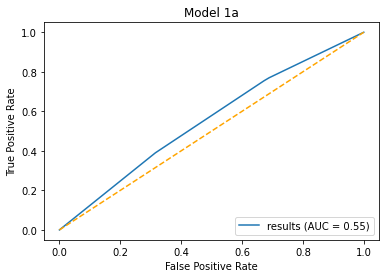

In [45]:
import matplotlib.pyplot as plt

# Import Metrics package
import sklearn.metrics as skm

# Make predictions for Model #1
heart2['pred_1a'] = model1a.predict(heart2)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(heart2['HeartDisease'], heart2['pred_1a'])


# ROC Curve Plot Function
def plot_roc(fpr,tpr, title):
    
    # AUC score
    auc_score = skm.auc(fpr,tpr)
    
    # ROC curve
    skm.RocCurveDisplay(fpr=fpr, tpr=tpr,
                        roc_auc=auc_score,
                        estimator_name='results').plot()
    
    # Add title to ROC curve
    plt.title(title)
    
    # Add the diagonal line
    plt.plot([0, 1], [0, 1], 
             color='orange', 
             linestyle='--')

# Display ROC Curve w/ AUC Score: Model1a
plot_roc(fpr,tpr, title='Model 1a')

In [46]:
model1a.predict({'BMI_Class':'Healthy Weight'})

0    0.06482
dtype: float64

#### Model #1
* AgeCategory
* Stroke

#### Interpretation: 
All coefficients are significant to the model. This model predicts that the probability of Heart Disease for a person 60 years of age or older who has had at least one stroke is about 43%.

AUC Score: 74%

In [47]:
from statsmodels.formula.api import logit

model1 = logit(formula="""HeartDisease ~ C(AgeCategory) + 
                                         C(Stroke)""", data=heart2).fit()

model1.summary()

Optimization terminated successfully.
         Current function value: 0.257333
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                          Logit   Df Residuals:                   319791
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.1194
Time:                        17:09:52   Log-Likelihood:                -82294.
converged:                       True   LL-Null:                       -93453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.4505      0.024    -60.141      0.000      -1.498      -1.403
C(AgeCategory)[T.Older Adult (60+)]       1.1610      0.017     69.644      0.000       1.128       1.194
C(AgeCategory)[T.Young Adult (18-39)]    -1.5585      0.039    -40.103      0.000      -1.635      -1.482
C(Stroke)[T.No Strokes]                  -1.5938      0.021    -76.756      0.000      -1.634      -1.553
=========================================================================================================
"""

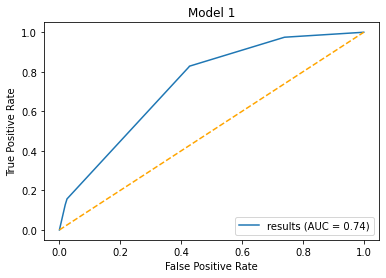

In [65]:
import matplotlib.pyplot as plt

# Import Metrics package
import sklearn.metrics as skm

# Make predictions for Model #1
heart2['pred_1'] = model1.predict(heart2)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(heart2['HeartDisease'], heart2['pred_1'])

# Display ROC Curve w/ AUC Score: Model1
plot_roc(fpr,tpr, title='Model 1')

In [49]:
model1.predict({'AgeCategory':'Older Adult (60+)', 'Stroke':'Had Stroke(s)'})

0    0.428141
dtype: float64

#### Model #2
* <b>GenHealth</b>
* AgeCategory
* Stroke

#### Interpretation: 
All coefficients are significant to the model. This model predicts that the probability of Heart Disease for a person between the ages of 18 and 39, in poor health, with no prior strokes is about 5%.  

AUC Score: 81%

In [50]:
model2 = logit(formula="""HeartDisease ~ C(AgeCategory) + 
                                         C(Stroke) +
                                         C(GenHealth)""", data=heart2).fit()

model2.summary()

Optimization terminated successfully.
         Current function value: 0.239835
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                          Logit   Df Residuals:                   319787
Method:                           MLE   Df Model:                            7
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.1793
Time:                        17:09:58   Log-Likelihood:                -76698.
converged:                       True   LL-Null:                       -93453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -2.9540      0.036    -81.523      0.000      -3.025      -2.883
C(AgeCategory)[T.Older Adult (60+)]       1.0994      0.017     64.491      0.000       1.066       1.133
C(AgeCategory)[T.Young Adult (18-39)]    -1.3898      0.039    -35.517      0.000      -1.466      -1.313
C(Stroke)[T.No Strokes]                  -1.1846      0.022    -54.183      0.000      -1.227      -1.142
C(GenHealth)[T.Fair]                      1.9805      0.030     66.062      0.000       1.922       2.039
C(GenHealth)[T.Good]                      1.3227      0.029     46.133      0.000       1.267       1.379
C(GenHealth)[T.Poor]                      2.5617      0.034     75.296      0.000       2.495       2.628
C(GenHealth)[T.Very good]                 0.5866      0.030     19.582      0.000       0.528       0.645
=========================================================================================================
"""

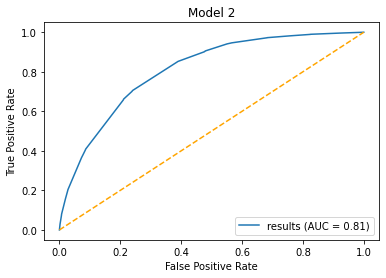

In [66]:
# Make predictions for Model #2
heart2['pred_2'] = model2.predict(heart2)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(heart2['HeartDisease'], heart2['pred_2'])

# Display ROC Curve w/ AUC Score: Model2
plot_roc(fpr,tpr, title='Model 2')

In [52]:
model2.predict({'GenHealth':'Poor', 'AgeCategory':'Young Adult (18-39)', 'Stroke':'No Strokes'})

0    0.048952
dtype: float64

### Add Numeric Variables: BMI vs Sleep Time

#### Model #3
* <b>BMI</b>
* GenHealth
* AgeCategory
* Stroke

#### Interpretation: 
All coefficients are significant to the model. This model has similar performance metrics to model #2. While it does not increase the AUC Score, this model does present the ability to take a patients weight into consideration. This model predicts that the probability of Heart Disease for an adult that is 60 years of age or older, in poor health, with a BMI of 30, who has had at least one stroke is about 67%

In [53]:
model3 = logit(formula="""HeartDisease ~ C(AgeCategory) + 
                                         C(Stroke) +
                                         C(GenHealth) +
                                         BMI""", data=heart2).fit()

model3.summary()

Optimization terminated successfully.
         Current function value: 0.239659
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                          Logit   Df Residuals:                   319786
Method:                           MLE   Df Model:                            8
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.1799
Time:                        17:10:05   Log-Likelihood:                -76642.
converged:                       True   LL-Null:                       -93453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -3.2528      0.046    -70.936      0.000      -3.343      -3.163
C(AgeCategory)[T.Older Adult (60+)]       1.1219      0.017     65.221      0.000       1.088       1.156
C(AgeCategory)[T.Young Adult (18-39)]    -1.3754      0.039    -35.120      0.000      -1.452      -1.299
C(Stroke)[T.No Strokes]                  -1.1897      0.022    -54.400      0.000      -1.233      -1.147
C(GenHealth)[T.Fair]                      1.9326      0.030     63.728      0.000       1.873       1.992
C(GenHealth)[T.Good]                      1.2865      0.029     44.544      0.000       1.230       1.343
C(GenHealth)[T.Poor]                      2.5154      0.034     73.319      0.000       2.448       2.583
C(GenHealth)[T.Very good]                 0.5675      0.030     18.906      0.000       0.509       0.626
BMI                                       0.0110      0.001     10.677      0.000       0.009       0.013
=========================================================================================================
"""

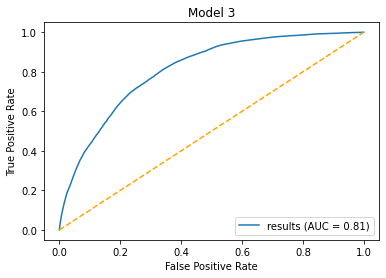

In [67]:
# Make predictions for Model #3
heart2['pred_3'] = model3.predict(heart2)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(heart2['HeartDisease'], heart2['pred_3'])

# Display ROC Curve w/ AUC Score: Model3
plot_roc(fpr,tpr, title='Model 3')

In [55]:
model3.predict({'BMI':30, 'AgeCategory':'Older Adult (60+)', 'Stroke':'Had Stroke(s)', 'GenHealth':'Poor'})

0    0.671172
dtype: float64

#### Model #4
* <b>SleepTime</b>
    * The SleepTime coefficient is insignificant to the model. This variable should be removed from the model.
* AgeCategory
* Stroke
* GenHealth

#### Interpretation:
This model adds the SleepTime column which produces a coeffient that is insignificant to the model. This variable may be removed as it can make the other coeffients less reliable. This model predicts that the probability of Heart Disease for an adult that is 60 years of age or older, in poor health, who gets 5 hours of sleep, and who has had at least one stroke is about 67%

AUC Score: 81%

In [56]:
model4 = logit(formula="""HeartDisease ~ C(AgeCategory) + 
                                         C(Stroke) +
                                         C(GenHealth) +
                                         SleepTime""", data=heart2).fit()

model4.summary()

Optimization terminated successfully.
         Current function value: 0.239831
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                          Logit   Df Residuals:                   319786
Method:                           MLE   Df Model:                            8
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.1793
Time:                        17:10:12   Log-Likelihood:                -76697.
converged:                       True   LL-Null:                       -93453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -2.9100      0.047    -62.165      0.000      -3.002      -2.818
C(AgeCategory)[T.Older Adult (60+)]       1.1022      0.017     64.251      0.000       1.069       1.136
C(AgeCategory)[T.Young Adult (18-39)]    -1.3895      0.039    -35.509      0.000      -1.466      -1.313
C(Stroke)[T.No Strokes]                  -1.1852      0.022    -54.200      0.000      -1.228      -1.142
C(GenHealth)[T.Fair]                      1.9786      0.030     65.944      0.000       1.920       2.037
C(GenHealth)[T.Good]                      1.3218      0.029     46.088      0.000       1.266       1.378
C(GenHealth)[T.Poor]                      2.5591      0.034     75.125      0.000       2.492       2.626
C(GenHealth)[T.Very good]                 0.5860      0.030     19.562      0.000       0.527       0.645
SleepTime                                -0.0062      0.004     -1.482      0.138      -0.014       0.002
=========================================================================================================
"""

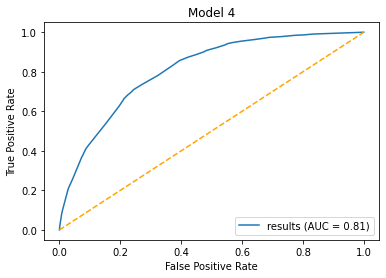

In [68]:
# Make predictions for Model #4
heart2['pred_4'] = model4.predict(heart2)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(heart2['HeartDisease'], heart2['pred_4'])

# Display ROC Curve w/ AUC Score: Model4
plot_roc(fpr,tpr, title='Model 4')

In [58]:
model4.predict({'SleepTime':5, 'AgeCategory':'Older Adult (60+)', 'Stroke':'Had Stroke(s)', 'GenHealth':'Poor'})

0    0.672636
dtype: float64

#### Model #5
* <b>Smoking vs Stroke</b>
    * Two coefficients are not statistically significant. This term can be removed from future models.
* AgeCategory
* Stroke
* GenHealth

#### Interpretation: 
After adding the interaction term, Smoking_Vs_Stroke, the model becomes difficult to interpret due to the lack of samples needed to compute performance metrics. Therefore, this variable can be removed. This model predicts that the probabilty of Heart Disease for an adult between the ages of 40 and 59, in poor health, with no history of strokes or smoking is about 19%.

AUC Score: 81%

In [59]:
model5 = logit(formula="""HeartDisease ~ C(AgeCategory) + 
                                         C(Stroke) +
                                         C(GenHealth) +
                                         C(Smoking_vs_Stroke)""", data=heart2).fit()

model5.summary()

         Current function value: 0.238402
         Iterations: 35


C:\Users\mmaje\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                          Logit   Df Residuals:                   319784
Method:                           MLE   Df Model:                           10
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.1842
Time:                        17:10:22   Log-Likelihood:                -76240.
converged:                      False   LL-Null:                       -93453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -3.0429      0.044    -69.521      0.000      -3.129      -2.957
C(AgeCategory)[T.Older Adult (60+)]               1.0964      0.017     64.164      0.000       1.063       1.130
C(AgeCategory)[T.Young Adult (18-39)]            -1.3509      0.039    -34.480      0.000      -1.428      -1.274
C(Stroke)[T.No Strokes]                          -0.6991        nan        nan        nan         nan         nan
C(GenHealth)[T.Fair]                              1.8995      0.030     63.067      0.000       1.840       1.959
C(GenHealth)[T.Good]                              1.2674      0.029     44.068      0.000       1.211       1.324
C(GenHealth)[T.Poor]                              2.4558      0.034     71.788      0.000       2.389       2.523
C(GenHealth)[T.Very good]                         0.5581      0.030     18.599      0.000       0.499       0.617
C(Smoking_vs_Stroke)[T.Non-Smoker_No Strokes]    -0.5642        nan        nan        nan         nan         nan
C(Smoking_vs_Stroke)[T.Smoker_Had Stroke(s)]      0.2727      0.041      6.581      0.000       0.192       0.354
C(Smoking_vs_Stroke)[T.Smoker_No Strokes]        -0.1336        nan        nan        nan         nan         nan
=================================================================================================================
"""

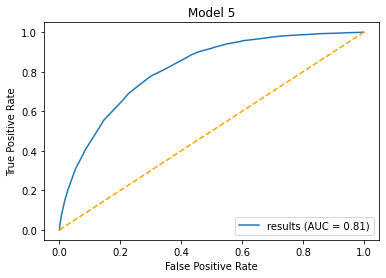

In [69]:
# Make predictions for Model #5
heart2['pred_5'] = model5.predict(heart2)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(heart2['HeartDisease'], heart2['pred_5'])
    
# Display ROC Curve w/ AUC Score: Model5
plot_roc(fpr,tpr, title='Model 5')    

In [61]:
model5.predict({'Stroke':'No Strokes', 'GenHealth':'Poor', 'AgeCategory':'Adult (40-59)', 'Smoking_vs_Stroke':'Smoker_No Strokes'})

0    0.194688
dtype: float64

#### Model #6
* <b>BMI vs Stroke</b>
    * Six coefficients are not statistically significant. This term can be removed from future models.
* AgeCategory
* Stroke
* GenHealth

#### Interpretation:
After adding the interaction term, BMI_Vs_Stroke, severaly coefficients become insignificant to the model. Therefore, this variable can be removed. This model predicts that the probabilty of Heart Disease for an adult between the ages of 40 and 59, in good health, obese, with no history of strokes is about 6%.

AUC Score: 81%

In [62]:
model6 = logit(formula="""HeartDisease ~ C(AgeCategory) + 
                                         C(Stroke) +
                                         C(GenHealth) +
                                         C(BMI_vs_Stroke)""", data=heart2).fit()

model6.summary()

         Current function value: 0.239487
         Iterations: 35


C:\Users\mmaje\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               319795
Model:                          Logit   Df Residuals:                   319780
Method:                           MLE   Df Model:                           14
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.1805
Time:                        17:10:34   Log-Likelihood:                -76587.
converged:                      False   LL-Null:                       -93453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -3.0658      0.051    -60.045      0.000      -3.166      -2.966
C(AgeCategory)[T.Older Adult (60+)]               1.1182      0.017     65.227      0.000       1.085       1.152
C(AgeCategory)[T.Young Adult (18-39)]            -1.3636      0.039    -34.809      0.000      -1.440      -1.287
C(Stroke)[T.No Strokes]                          -0.9182   1.38e+04  -6.64e-05      1.000   -2.71e+04    2.71e+04
C(GenHealth)[T.Fair]                              1.9349      0.030     63.816      0.000       1.876       1.994
C(GenHealth)[T.Good]                              1.2795      0.029     44.231      0.000       1.223       1.336
C(GenHealth)[T.Poor]                              2.5287      0.034     73.686      0.000       2.461       2.596
C(GenHealth)[T.Very good]                         0.5573      0.030     18.547      0.000       0.498       0.616
C(BMI_vs_Stroke)[T.Healthy Weight_No Strokes]    -0.2905   1.38e+04   -2.1e-05      1.000   -2.71e+04    2.71e+04
C(BMI_vs_Stroke)[T.Obese_Had Stroke(s)]           0.2359      0.053      4.455      0.000       0.132       0.340
C(BMI_vs_Stroke)[T.Obese_No Strokes]             -0.0644   1.38e+04  -4.66e-06      1.000   -2.71e+04    2.71e+04
C(BMI_vs_Stroke)[T.Overweight_Had Stroke(s)]      0.1315      0.054      2.453      0.014       0.026       0.236
C(BMI_vs_Stroke)[T.Overweight_No Strokes]        -0.0812   1.38e+04  -5.88e-06      1.000   -2.71e+04    2.71e+04
C(BMI_vs_Stroke)[T.Underweight_Had Stroke(s)]    -0.0019      0.147     -0.013      0.989      -0.289       0.285
C(BMI_vs_Stroke)[T.Underweight_No Strokes]       -0.4817   1.38e+04  -3.49e-05      1.000   -2.71e+04    2.71e+04
=================================================================================================================
"""

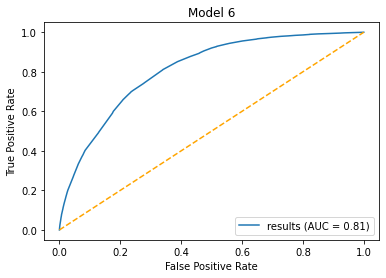

In [70]:
# Make predictions for Model #6
heart2['pred_6'] = model6.predict(heart2)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(heart2['HeartDisease'], heart2['pred_6'])
    
# Display ROC Curve w/ AUC Score: Model6
plot_roc(fpr,tpr, title='Model 6')    

In [64]:
model6.predict({'Stroke':'No Strokes', 'GenHealth':'Good', 'AgeCategory':'Adult (40-59)', 'BMI_vs_Stroke':'Obese_No Strokes'})

0    0.059026
dtype: float64

## Champion Model: Model #2: AUC 81%

### Interpretation: 
While other models also had an AUC score of 81%, this model does not contain extra information that may complicate the interpretability of the model. Additionally, Model #2 contains variables that are the best predictors of Heart Disease in the data. AgeCategory, Stroke, and GenHealth data are both easy to understand and interpret to patients, doctors, etc. This model was chosen because it does the best job predicting Heart Disease without sacraficing simplicity and interpretability. 

In [71]:
pd.crosstab(heart2['GenHealth'], heart2['HeartDisease'], normalize='index')

HeartDisease,0,1
GenHealth,,
Excellent,0.977559,0.022441
Fair,0.795715,0.204285
Good,0.897368,0.102632
Poor,0.658960,0.341040
Very good,0.952739,0.047261
